In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import datetime as dt

In [2]:
covid=pd.read_csv('processed.csv')
covid.head()

,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_created_at,verified,lang,datetime,hashtag,polarity,subjectivity
0,KingKatriar,When nation fighting grim battle amidst medica...,Twitter for Android,True,False,7991,4,IN,"Mumbai, India",city,5360,3340,2010-02-12T16:34:18Z,False,en,2020-04-02 00:00:16+00:00,['#coronavirus'],-0.666667,0.666667
1,mishralokk,3/n At 1 million mark top 5 countries recovere...,Twitter for Android,False,False,1199,0,IN,"Gurgaon, India",city,2862,235,2017-04-27T19:44:13Z,False,en,2020-04-03 00:00:17+00:00,['#CoronavirusPandemic'],0.500000,0.500000
2,asliranjit,narendramodi ji Is Harsh Decision ke lie We fo...,Twitter for Android,False,False,351,0,IN,"New Delhi, India",city,199,37,2012-01-15T19:47:31Z,False,en,2020-03-30 00:00:22+00:00,['#Covid_19'],-0.100000,0.500000
3,srijanpalsingh,For resorted bursting crackers flying Chinese ...,Twitter for Android,False,False,9518,15,IN,"New Delhi, India",city,31678,2085,2010-01-07T09:11:12Z,True,en,2020-04-06 00:00:28+00:00,['#Covid_19'],-0.208333,0.225000
4,dhruvvjyoti,May spirit season new year form invisible host...,Twitter for Android,False,False,30,0,IN,"Dibrugarh, India",city,5,17,2018-12-27T17:13:44Z,False,en,2020-04-14 00:01:11+00:00,"['#SubhoNoboBorsho', '#PoilaBaisakh', '#StayHo...",0.136364,0.454545


In [3]:
covid.isnull().sum()

screen_name           0
text                  0
source                0
is_quote              0
is_retweet            0
favourites_count      0
retweet_count         0
country_code          0
place_full_name       0
place_type            0
followers_count       0
friends_count         0
account_created_at    0
verified              0
lang                  0
datetime              0
hashtag               0
polarity              0
subjectivity          0
dtype: int64

In [4]:
covid=covid.rename(columns={'datetime':'created_at'})

In [5]:
covid.head()

,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_created_at,verified,lang,created_at,hashtag,polarity,subjectivity
0,KingKatriar,When nation fighting grim battle amidst medica...,Twitter for Android,True,False,7991,4,IN,"Mumbai, India",city,5360,3340,2010-02-12T16:34:18Z,False,en,2020-04-02 00:00:16+00:00,['#coronavirus'],-0.666667,0.666667
1,mishralokk,3/n At 1 million mark top 5 countries recovere...,Twitter for Android,False,False,1199,0,IN,"Gurgaon, India",city,2862,235,2017-04-27T19:44:13Z,False,en,2020-04-03 00:00:17+00:00,['#CoronavirusPandemic'],0.500000,0.500000
2,asliranjit,narendramodi ji Is Harsh Decision ke lie We fo...,Twitter for Android,False,False,351,0,IN,"New Delhi, India",city,199,37,2012-01-15T19:47:31Z,False,en,2020-03-30 00:00:22+00:00,['#Covid_19'],-0.100000,0.500000
3,srijanpalsingh,For resorted bursting crackers flying Chinese ...,Twitter for Android,False,False,9518,15,IN,"New Delhi, India",city,31678,2085,2010-01-07T09:11:12Z,True,en,2020-04-06 00:00:28+00:00,['#Covid_19'],-0.208333,0.225000
4,dhruvvjyoti,May spirit season new year form invisible host...,Twitter for Android,False,False,30,0,IN,"Dibrugarh, India",city,5,17,2018-12-27T17:13:44Z,False,en,2020-04-14 00:01:11+00:00,"['#SubhoNoboBorsho', '#PoilaBaisakh', '#StayHo...",0.136364,0.454545


In [91]:
text_en=covid['text']

In [92]:
text_en_lc = text_en.apply(lambda x: x.lower())
text_en_lc.head()

0    when nation fighting grim battle amidst medica...
1    3/n at 1 million mark top 5 countries recovere...
2    narendramodi ji is harsh decision ke lie we fo...
3    for resorted bursting crackers flying chinese ...
4    may spirit season new year form invisible host...
Name: text, dtype: object

In [93]:
word_list = [word for line in text_en_lc for word in line.split()]
word_list[:5]

['when', 'nation', 'fighting', 'grim', 'battle']

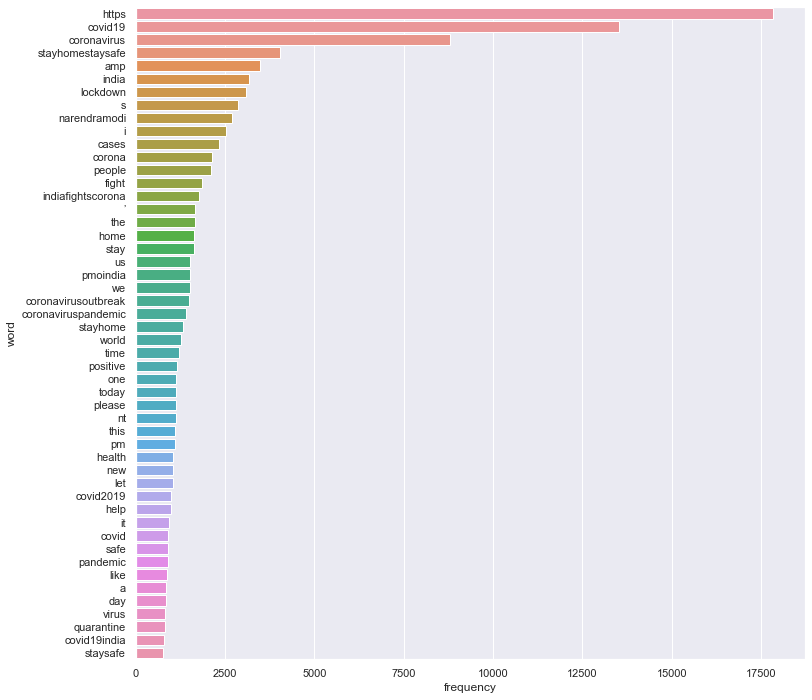

In [12]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

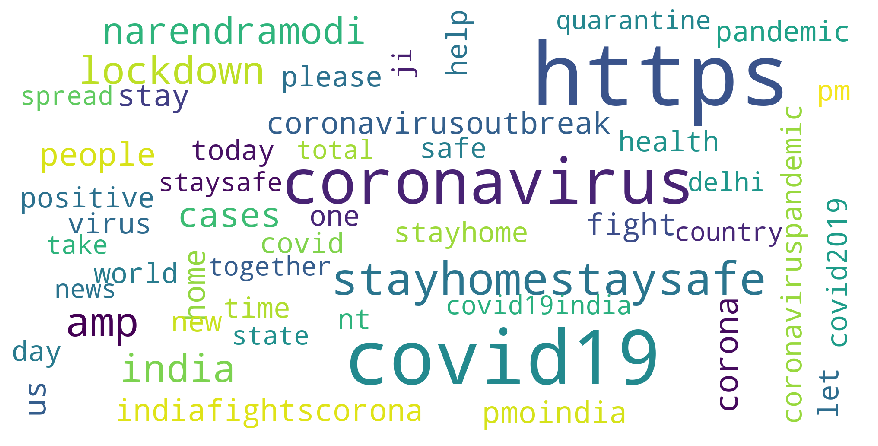

In [88]:
wordcloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

In [14]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aamir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = text_en_lc.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.head()

,neg,neu,pos,compound
0,0.426,0.357,0.217,-0.8225
1,0.000,0.886,0.114,0.2023
2,0.116,0.800,0.084,-0.2023
3,0.327,0.545,0.128,-0.8553
4,0.105,0.813,0.081,-0.1280


In [18]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

,neg,neu,pos,compound,val
0,0.426,0.357,0.217,-0.8225,negative
1,0.000,0.886,0.114,0.2023,positive
2,0.116,0.800,0.084,-0.2023,negative
3,0.327,0.545,0.128,-0.8553,negative
4,0.105,0.813,0.081,-0.1280,negative


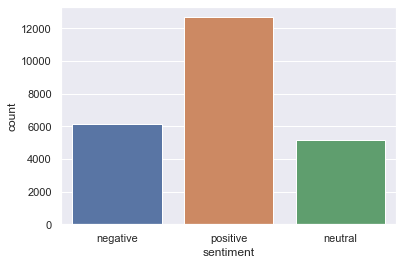

In [19]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')

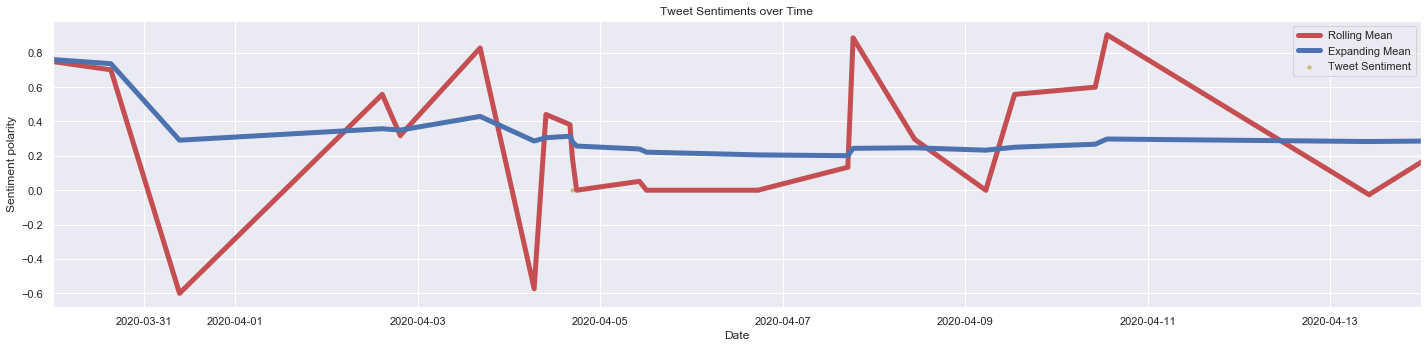

In [106]:
sentiments_time_df = pd.DataFrame()
sentiments_time_df['time'] = covid['created_at']
sentiments_time_df['polarity'] = sent_scores_df['compound']
sentiments_time_df.index = pd.to_datetime(sentiments_time_df['time'])


ot = sentiments_time_df.sample(frac=.001)
ot['time'] = pd.to_datetime(ot['time'])
ot.index = pd.to_datetime(ot['time'])
ot.sort_index(inplace=True)
ot['expanding'] = ot['polarity'].expanding().mean()
ot['rolling'] = ot['polarity'].rolling('1h').mean()

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(ot['time'],ot['polarity'], label='Tweet Sentiment', s = 10, color = 'y')
ax.plot(ot['time'],ot['rolling'], color ='r', label='Rolling Mean', linewidth = 5)
ax.plot(ot['time'],ot['expanding'], color='b', label='Expanding Mean', linewidth = 5)
ax.set_xlim([dt.date(2020,3,30),dt.date(2020,4,14)])
ax.set(title='Tweet Sentiments over Time', xlabel='Date', ylabel='Sentiment polarity')
ax.legend(loc='best')
fig.tight_layout()
plt.savefig('temporal_sentiments.png')


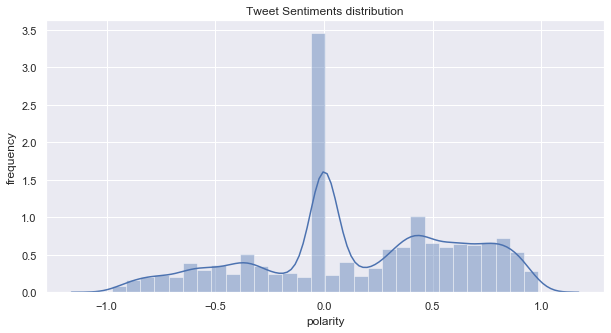

In [71]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Tweet Sentiments distribution', xlabel='polarity', ylabel='frequency')
sns.distplot(sentiments_time_df['polarity'], bins=30, ax=ax)
# plt.show()
plt.savefig('sentiment_distribution.png')

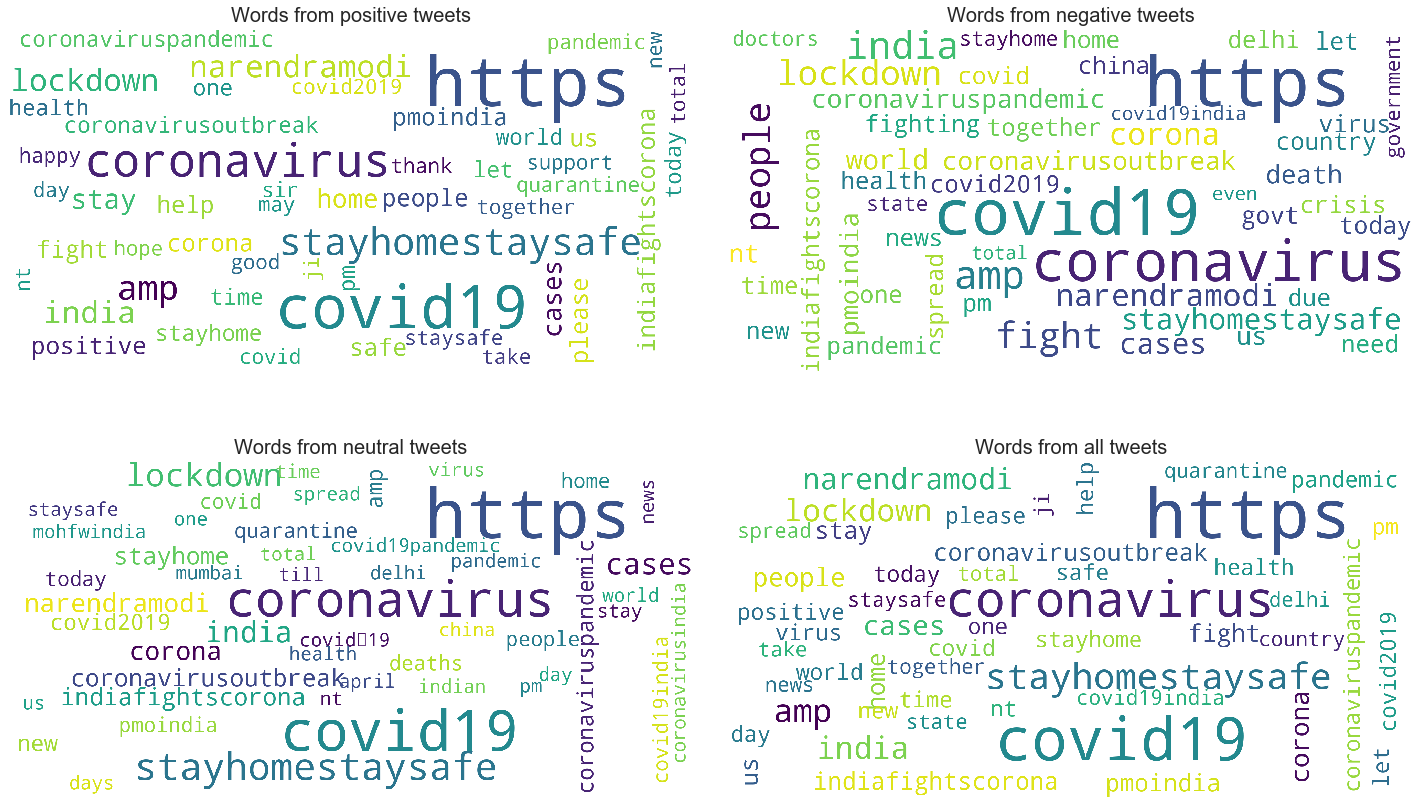

In [89]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = text_en_lr_lc_pr
polar_tweets_df['polarity'] = sent_scores_df['val']

positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['tweet']
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['tweet']
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['tweet']

positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]

positive_cloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# fig.suptitle('Clouds of polar words', fontsize = 30)
fig.tight_layout(pad = 0)

axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Words from positive tweets', fontsize = 20)
axs[0, 0].axis('off')
# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Words from negative tweets', fontsize = 20)
axs[0, 1].axis('off')
# axs[0, 1].tight_layout(pad = 1)

axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 0].axis('off')
# axs[1, 0].tight_layout(pad = 1)

axs[1, 1].imshow(wordcloud)
axs[1, 1].set_title('Words from all tweets', fontsize = 2)
axs[1, 1].axis('off')
# axs[1, 0].tight_layout(pad = 1)
plt.savefig('joint_cloud.png')